# Week 9: Random Number Generators

<font size="6"> Laboratory 6 </font> <br>
<font size="3"> Last updated July 26, 2023 </font>

## <span style="color:orange;"> 00. Content </span>

<font size="5"> Mathematics </font>
- N/A
     
<font size="5"> Programming Skills </font>
- Multi-dimensional arrays
- Reading and Writing Files
    
<font size="5"> Embedded Systems </font>
- Thonny & MicroPython

## <span style="color:orange;"> 0. Required Hardware </span>

- Raspberry Pi Pico
- MAX30102 Pulse sensor
- Camera (Arducam HM01B0)
- Ceramic Capacitor
- Breadboard
- USB connector
- 8 Wires

<h3 style="background-color:lightblue"> Write your name and email below: </h3>

**Name:** Shiva Sai Vummaji

**Email:** svummaji@purdue.edu

In [1]:
import numpy as np
import matplotlib.pyplot as plt  

## <span style="color:orange;">1. Applications of Random Number Generators </span>
Random number generators (RNGs) are the foundation of computer security. The ability to send encrypted messages depends on RNGs. Secure systems are undoubtedly important as the value of our personal data is ever increasing. Whether it's financial information, medical records, or simply messages to a friend, information is protected by generating random numbers unpredictable enough to prevent a hacker from guessing what's next. Random numbers are needed for a variety of tasks like drawing lottery numbers, choosing random samples for scientific studies, and creating video games.

RNGs have a surprisingly long history, dating back 5000 years ago with coin-flipping and dice-rolling as the main methods. Many modern approaches are hardware-based as well but much faster than rolling dice repeatedly. For example, in 1996, Silicon Graphics patented a system of random number generation using a wall of lava lamps. The exact state of a lava lamp, let alone multiple, at any time is too complex to model and predict, and so any number based on this chaotic system is secure. Another true RNG is [RANDOM.ORG](https://www.random.org/), which uses multiple radio receivers capturing atmospheric noise to create its random numbers.

True RNGs (TRNGs) are characterized by having no predictable patterns in generated sequences and are generally slow to output a large amount of random numbers. TRNGs are relatively hard to implement as a computer program, so pseudorandom number generators (PRNGs) allow computers to simulate randomness through a deterministic process or an easy rule for the program to follow. PRNGs need a starting value called a seed and then based on the seed value pull up a previously created list of random numbers. PRNGs are not always safe enough to use for cryptographic purposes, but having a truly random seed makes them less predictable.

In this lab, we will create a random binary sequence of ones and zeros using different hardware methods and test them mathematically to judge the randomness of the results.

We only need a random binary sequence to generate random numbers in any range. The reasons behind this are that we can convert between number bases and that computers store numbers in a finite amount of bits. A bit is the smallest unit of information a computer can store. Bits are either 0 or 1. Python uses 32 or 64 bits to store floating-point numbers and integers.

## <span style="color:orange;">2. Making an RNG </span>

### Method A

We will use the Raspberry Pi Pico's internal temperature sensor, as in Lab 2.

Collect a thousand temperature measurements. For each measurement, subtract 10,000 and convert the result to binary. Continue this process for each measurement. The result will be our random sequence.

For example, if the temperature measurements are $10003, 10002, 10003$, and $10005$, after subtracting, we get $3, 2, 3, 5$.
The number 3 is represented as 11 in binary, 2 as 10, and 5 as 101.
Therefore, our final binary sequence is `111011101`.

### <span style="color:red"> Exercise 1</span>

Use Method A and print the first 10 binary digits of the sequence. 

<h3 style="background-color:lightblue"> Write Answers for Exercise 1 Below </h3>

In [2]:
def adc_to_temperature(adc_value):
    voltage = adc_value * (3.3 / 65535) 
    temperature = 27 - (voltage - 0.706) / 0.001721 
    return int(temperature * 1000)

binary_sequence = ""

# Open and read the existing temp.txt file
with open("temp.txt", "r") as file:
    for line in file:
        adc_value = int(line.strip())
        temp_milli = adc_to_temperature(adc_value) 
        adjusted_value = temp_milli - 10000 
        binary_representation = bin(adjusted_value)[2:]

        binary_sequence += binary_representation 

print("First 10 binary digits:", binary_sequence[:10])

First 10 binary digits: 1011001010


### Method B

#### Heart Rate Sensor

You will collect data today using a **MAX30102 Pulse Oximeter and Heart Rate Sensor**, but you will only use the Heart Rate Sensor. The MAX30102 module consists of two different types of LEDs (Red and IR) and a photodetector.

|<img src="https://raw.githubusercontent.com/TheDataScienceLabs/DSLab_Probability/main/book/labs/shared_files/heart_rate_estimation/MAX30102.png" alt="MAX30102" width="500"/>|
|:--:| 
| *MAX30102 Pulse Oximeter and Heart Rate Sensor* |

The main idea is that the light emitted by each LED is directed to the skin, and the photodetector measures the amount of light reflected. This method of pulse detection through light is called Photoplethysmogram. The reflection of infrared light (IR) changes proportionally to the volume of blood in the artery and is synchronized with the cardiac cycle. During the heartbeat, the volume of blood is high, and after each heartbeat, it is low.


"During the systolic phase, the volume of blood in arteries is more; this is because during this phase heart contracts and pushes oxygen-rich blood to all the tissues and organs. The systolic phase causes more light is absorbed by the blood cells. Therefore the amount of light detected by the photode-tector during the systolic phase is low. During the diastolic phase, the blood has flown back into the heart. Therefore, during the diastole phase, the light detected by the photo-detector increases due to a decrease in the blood volume." [3]

|<img src="https://raw.githubusercontent.com/TheDataScienceLabs/DSLab_Probability/main/book/labs/shared_files/heart_rate_estimation/PPG_generation_and_waveform_features.jpg" alt="Principle of phototoplethysmogram generation and waveform features" width="300"/>| 
|:--:| 
| *Principle of phototoplethysmogram generation and waveform features* [2]|

The figure above shows that the PPG waveform is obtained by inverting the intensity of the light detected with the photodetector after the light is reflected or transmitted through the human tissue [2]. In the case of our sensor, it would be reflected since the MAX30102 is of the reflective type.

#### Wiring It Up

**MAKE SURE PICO IS UNPLUGGED FROM COMPUTER BEFORE WIRING**

To use the heart rate sensor, there are only four pins to connect with our microcontroller: power (VIN), ground (GND), and the two I2C pins (SCL and SDA).

|<img src="https://raw.githubusercontent.com/TheDataScienceLabs/DSLab_Probability/main/book/labs/shared_files/heart_rate_estimation/MAX30102_pins.png" alt="MAX30102_pins" width="500"/>|
|:--:| 
| *MAX30102 pins* |

Unplug your microcontroller from the computer and wire up the MAX30102 sensor according to the following instructions, inspecting the data sheet for the Pico:

![pico_datasheet](https://raw.githubusercontent.com/TheDataScienceLabs/DSLab_Probability/main/book/labs/shared_files/heart_rate_estimation/Pico%20Datasheet.png)


|MAX30102 | Module MAX30102|
| ----------- | ----------- |
|GND|GND|
|SCL|I2C0 SCL or I2C1 SCL|
|SDA|I2C0 SDA or I2C1 SDA|
|VCC|3V3(OUT)|

You will also need to connect a ceramic capacitor between the 3V3(OUT) pin and the GND pin you are using.

Here are some images of the completed breadboard:

![wiring_example](https://raw.githubusercontent.com/TheDataScienceLabs/DSLab_Probability/main/book/labs/shared_files/heart_rate_estimation/wiring_example.jpg)

![capacitor_placement](https://raw.githubusercontent.com/TheDataScienceLabs/DSLab_Probability/main/book/labs/shared_files/heart_rate_estimation/capacitor_placement.jpg)

**Note: Have your TA check over your wiring before continuing onward.**

#### Loading firmware onto the microcontroller

Plug the pico into your computer while holding the BOOTSEL button. Open up Thonny. [Follow the directions here](https://projects.raspberrypi.org/en/projects/getting-started-with-the-pico/3) to install the MicroPython firmware on the Pico. [The following page at that link](https://projects.raspberrypi.org/en/projects/getting-started-with-the-pico/4) has directions for testing to make sure it’s working.

Use Thonny’s file manager to transfer [`main.py`](https://github.com/TheDataScienceLabs/DSLab_Probability/blob/main/book/labs/shared_files/heart_rate_estimation/main.py) file and the [`max30102`](https://github.com/TheDataScienceLabs/DSLab_Probability/tree/main/book/labs/shared_files/heart_rate_estimation/max30102) folder to the Pico. The `max30102` folder is a module that functions as the MAX30102 sensor driver ported to MicroPython, and the `main.py` file has the necessary to connect to the sensor and start reading your pulse when you put your finger on the sensor. 
- - -
Note: You may have to modify the lines of the `main.py` file that set up the I2C bus according to whichever specific SCL and SDA pins you are using - remember to use the number labeled with GP on the diagram
- - -

### Acquiring data!

**Read this carefully.** In Thonny, run `main.py`. You should see numbers printing on the terminal, and the LED on your Pico should be on. (If this is not the case, go back and check your wiring and ensure you have uploaded the required files onto the Pico).

Next, while the readings are printing, open up the *"Run"* dropdown menu in the top left corner of Thonny and click on *"Disconnect"* at the bottom of the menu. This will allow the notebook to access the MAX30102 data from the Pico. Once the Pico is disconnected, you can run the two code cells below to create a live graph of your pulse.

#### Using the sensor

Download the [hbconnection.py](https://github.com/TheDataScienceLabs/DSLab_Probability/blob/main/book/labs/shared_files/heart_rate_estimation/hbconnection.py) file from the repository and add it to your lab folder to access its functions in the following cell.

The following cell will show you the data taken by the sensor in real-time.

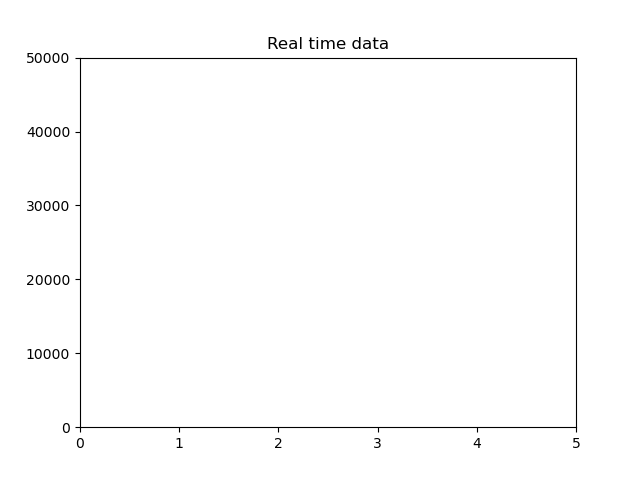

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from hbconnection import acquire
%matplotlib widget


sampling_rate =  500 # you must fill this in! - Options: 50, 100, 200, 400, 800, 1000, 1600, 3200
sampling_duration = 5 # seconds
number_of_samples = sampling_rate * sampling_duration

x = np.arange(number_of_samples)/sampling_rate
y = np.full_like(x, np.nan)

fig, ax = plt.subplots()
line,  = plt.plot(x, y)
plt.xlim(0, sampling_duration)
plt.ylim(0_000, 50_000) # change this to fit heartbeat to graph
plt.title('Real time data')
plt.show()

Now, put your finger on the sensor, making sure it covers both the photodetector and the LEDs. **Do not apply too much or too little pressure**. Your finger should barely touch the sensor. **Once you have it situated correctly, run the following cell to acquire data.** This cell contains a while True loop, which will run indefinitely until we take action to stop it. **Once you have detected your pulse, click the *"Stop"* button** at the top of the page to exit the loop. The displayed data will be stored.

- - -
Note: You may need to adjust the bounds of the `plt.ylim()` function for a better representation of your data.
- - -

In [22]:
try:
    while True:
        acquire(sampling_rate, y, line, fig, number_of_samples)
except KeyboardInterrupt:
    print('done acquiring!')
    np.savetxt('heartbeat_ini.txt', y)

done acquiring!


Re-run the above cell as many times as necessary to obtain a good, clean measurement that shows a clear heartbeat pattern. You can modify the y-axis limits to improve the visibility of the signal behavior.

Take a look at the file you just created, if needed. You should be able to open it right here in JupyterLab. It will display a long list of numbers.

If you're having significant issues collecting heartbeat data, you may use the [heartbeat_backup.txt](https://github.com/TheDataScienceLabs/DSLab_Probability/blob/4d804f25560ee646260fd581fa7246bd8cc4af5d/book/labs/shared_files/heart_rate_estimation/heartbeat_backup.txt) file with the permission of your instructor.

### <span style="color:red"> Exercise 2</span>

To get to a final random sequence, use your measurements from `heartbeat_ini.txt` (or [`heartbeat_backup.txt`](https://github.com/TheDataScienceLabs/DSLab_Probability/blob/main/book/labs/shared_files/heart_rate_estimation/heartbeat_backup.txt) if you were having trouble with the data collection). For each measurement, subtract the minimum value and convert the result to binary. Continue for all the measurements like in Method A.


After collecting a few seconds' worth of heartbeat measurements, apply Method B and print the first 10 binary digits of the resulting sequence.

*Hint: look into the `np.loadtxt()` function*

<h3 style="background-color:lightblue"> Write Answers for Exercise 2 Below </h3>

In [26]:
y = np.loadtxt('heartbeat_ini.txt')
print(y)
min_value = np.min(y)
new_values = y - min_value
binary_sequence = ''.join(bin(int(value))[2:] for value in new_values)

print("Method A - First 10 binary digits:", binary_sequence[:10])

xor_sequence = [int(new_values[i]) ^ int(new_values[i+1]) for i in range(len(new_values)-1)]
binary_xor_sequence = ''.join(bin(value)[2:] for value in xor_sequence)

print("Method B - First 10 binary digits:", binary_xor_sequence[:10])

[29851. 29851. 29852. 29851. 29851. 29851. 29852. 29852. 29851. 29852.
 29850. 29851. 29851. 29851. 29852. 29851. 29852. 29851. 29851. 29852.
 29851. 29851. 29852. 29852. 29851. 29852. 29851. 29851. 29851. 29852.
 29851. 29852. 29851. 29852. 29852. 29851. 29852. 29851. 29851. 29851.
 29852. 29851. 29851. 29851. 29851. 29851. 29852. 29851. 29851. 29851.
 29851. 29851. 29851. 29851. 29851. 29851. 29851. 29851. 29851. 29851.
 29851. 29851. 29851. 29851. 29851. 29852. 29851. 29851. 29851. 29851.
 29851. 29852. 29851. 29851. 29851. 29851. 29851. 29851. 29851. 29851.
 29851. 29851. 29852. 29852. 29851. 29851. 29851. 29852. 29852. 29851.
 29851. 29851. 29852. 29851. 29852. 29851. 29852. 29851. 29851. 29851.
 29851. 29851. 29852. 29852. 29851. 29852. 29852. 29851. 29851. 29851.
 29851. 29851. 29852. 29852. 29852. 29851. 29852. 29852. 29852. 29851.
 29851. 29851. 29851. 29851. 29850. 29852. 29851. 29851. 29851. 29851.
 29851. 29851. 29851. 29851. 29851. 29851. 29852. 29851. 29852. 29851.
 29852

### Method C

A camera, like any sensor, is susceptible to noise, and we can utilize this noise for a random number generator (RNG). Follow the wiring instructions from Lab 4 to connect the camera component to the Pico.

Our cameras return a grayscale image with dimensions of $96\times 96$. If we capture a noisy scene, we can flatten the image into a 1-dimensional sequence of length $96^2 = 9216$ and transform it into a binary sequence based on parity (whether the values are even or odd). You can choose how to transform the $96\times 96$ image array into a 1-dimensional sequence. **For the noisy scene, we'll use the carpeted floor of the room**.

### <span style="color:red"> Exercise 3</span>

Use Method C on an image you captured and print the first 10 binary digits of the sequence. 

In [2]:
import time
import serial
from serial.tools import list_ports
%matplotlib widget

PICO_HWID = "2E8A"


def get_pico_port():
    pico_ports = list(list_ports.grep(PICO_HWID))
    if len(pico_ports) == 0:
        raise Exception(
            "No Raspberry Pi Pico was detected. Check to make sure it is plugged in, and that no other programs are accessing it"
        )
    return pico_ports[0].device


print("Here are all the serial devices detected:")
for port in list_ports.comports():
    print(port.device, port.hwid)

port = get_pico_port()
print(f"\nselected port {port} as most likely to have a raspberry pi pico")

Here are all the serial devices detected:
/dev/cu.debug-console n/a
/dev/cu.ShivasBoseFlexSoundLink n/a
/dev/cu.Bluetooth-Incoming-Port n/a
/dev/cu.usbmodem2101 USB VID:PID=2E8A:000A SER=E660C062136C6133 LOCATION=2-1

selected port /dev/cu.usbmodem2101 as most likely to have a raspberry pi pico


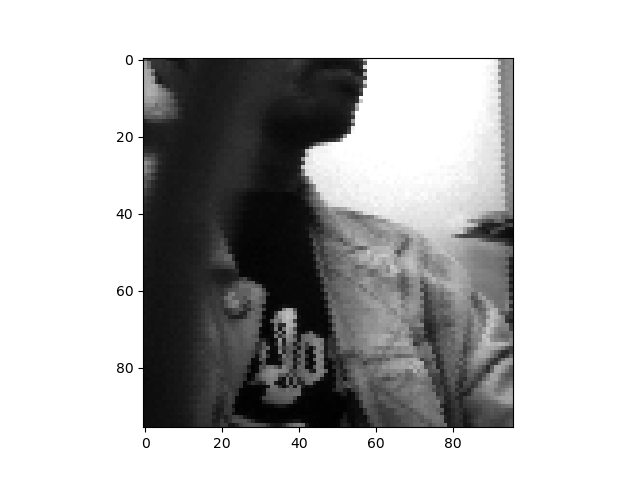

In [7]:
buffer = bytearray(96 * 96)
img = np.zeros(shape=(96, 96), dtype="uint8")

with serial.Serial(port, timeout=1) as s:
    s.read_until(b"\x55\xAA")
    s.readinto(buffer)
    img.flat[::-1] = buffer

plt.imshow(img, cmap="gray")
plt.show()

<h3 style="background-color:lightblue"> Write Answers for Exercise 3 Below </h3>

In [8]:
binary_sequence = ''.join('1' if pixel % 2 else '0' for pixel in img.flatten())
print("Method C - First 10 binary digits:", binary_sequence[:10])

Method C - First 10 binary digits: 0100110101


### Method D

The Mersenne Twister is a pseudorandom number generator (PRNG) implemented in many products, including Python. It derives its name from a special type of prime number known as a Mersenne prime. Mersenne primes are prime numbers in the form of $2^p-1$, and as of December 2022, only 51 Mersenne primes have been discovered (with 48 verified). The intricate details of the Mersenne Twister algorithm go beyond the scope of this lab. Surprisingly, the algorithm itself doesn't involve complex arithmetic operations like multiplication or addition.

Here's a quick example on how to use the `randint` function from Python's random module, which relies on the Mersenne Twister.


In [7]:
from random import randint

x = [randint(0,1) for i in range(10)]
print(x)

[1, 1, 0, 1, 1, 1, 1, 1, 0, 1]


## <span style="color:green;"> Reflection </span>

1. List whether each method we used was truly random or pseudorandom.<br>
2. Which part of the lab did you find the most challenging? <br>
3. Which part of the lab did was the easiest?

<h3 style="background-color:lightblue"> Write Answers for the Reflection Below </h3>

1. Method A is pseudorandom because it would have some noise that is predictable. Method B is pseudorandom because it could have some noise when measuring that is predictable. Method C is truly random because the noise here is not predictable or expected. 
2. The part of the lab that was the most challenging for me was method B, when I was trying to acquire data and connect through Thonny. I was having difficulties in this process. 
3. The easiest part of the lab was Method A and D because for A all we had to do was utilize data from lab 2 and just convert it into binary. For part D, all we had to do was just run the code and understand how randint works. 

## References
1. Elgendi M. On the analysis of fingertip photoplethysmogram signals. Curr Cardiol Rev. 2012 Feb;8(1):14-25. doi: 10.2174/157340312801215782.

2. Junyung Park, Hyeon Seok Seok, Sang-Su Kim1 and Hangsik Shin. Photoplethysmogram Analysis and Applications: An Integrative Review. Front. Physiol., 01 March 2022. Sec. Vascular Physiology. https://doi.org/10.3389/fphys.2021.808451. 

3. Pankaj, Kumar, A., Komaragiri, R. et al. A Review on Computation Methods Used in Photoplethysmography Signal Analysis for Heart Rate Estimation. Arch Computat Methods Eng 29, 921–940 (2022). https://doi.org/10.1007/s11831-021-09597-4